## Importing the Data

In [3]:
# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_spectra = pd.read_csv('data/spectra.csv', header=None)
df_bts = pd.read_csv('data/BTS.csv')
df_bts.head()

,ZTFID,IAUID,RA,Dec,peakt,peakfilt,peakmag,peakabs,duration,rise,fade,type,redshift,b,A_V
0,ZTF17aaaeqms,AT2023jkf,01:19:13.43,+31:46:26.1,2102.97,r,17.5839,-,18.001,12.004,5.997,-,-,-30.726791,0.205
1,ZTF17aaajowi,-,11:47:44.37,+14:34:10.4,1362.73,r,18.9963,-,>5.611,2.651,>2.96,-,-,70.564727,0.127
2,ZTF17aaanztg,AT2021abaw,10:04:06.59,-01:12:18.6,1501.02,r,18.3035,-,>14.737,>3,11.737,-,-,40.798120,0.210
3,ZTF17aaaocnx,AT2019dlf,06:12:54.20,+48:49:57.0,584.70,g,17.2290,-,6.213,0.803,5.41,-,-,14.194943,0.407
4,ZTF17aaaptxx,AT2023gdf,11:54:24.96,+09:36:32.8,2053.73,g,18.9437,-,>2,>2,>0,-,-,67.910221,0.079


## Data Cleaning

In [4]:
# Transpose data so SuperNova are rows
df_spectra = df_spectra.transpose()
df_spectra.iloc[0,0] = 'ZTFID'

df_spectra.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,ZTFID,errors,followup_request_id,created_at,units,assignment_id,modified,obj_id,altdata,observed_at,...,groups,pis,reducers,observers,observed_at_mjd,owner,obj_internal_key,external_reducer,external_observer,external_pi
1,ZTF22abfpgcn,"[3.819e-34, 3.201e-34, 1.493e-34, 9.351e-32, 7...",16946,2022-09-07T11:16:53.599008,NaN,NaN,2022-09-07T11:16:53.599008,ZTF22abfpgcn,"{'JD': 2459829.9428332, 'RA': 19600.12, 'ADC':...",2022-09-07T10:37:40,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59829.442824074074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",36b81dbf-18f6-49be-be2e-cdb713badbb5,NaN,NaN,NaN
2,ZTF21aaqyetj,NaN,2865,2021-04-20T05:24:50.434325,NaN,NaN,2021-04-20T05:24:50.434325,ZTF21aaqyetj,"{'JD': 2459324.6918952, 'RA': 33918.65, 'ADC':...",2021-04-20T04:36:18,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59324.191875,"{'username': 'sedm-robot', 'first_name': 'SEDm...",58a402af-3650-4992-a84f-cb0f1d80abf6,NaN,NaN,NaN
3,ZTF21aaygqkb,NaN,3374,2021-05-28T11:21:00.460649,NaN,NaN,2021-05-28T11:21:00.460649,ZTF21aaygqkb,"{'JD': 2459362.9333179, 'RA': 85936.18, 'ADC':...",2021-05-28T10:23:58,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59362.43331018519,"{'username': 'sedm-robot', 'first_name': 'SEDm...",29999d1d-f375-4933-809d-60350093e46f,NaN,NaN,NaN
4,ZTF21aanwbhk,NaN,2348,2021-03-17T14:03:56.951777,NaN,NaN,2021-03-17T14:03:56.951777,ZTF21aanwbhk,"{'JD': 2459290.7206854, 'RA': 42818.77, 'ADC':...",2021-03-17T05:17:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59290.220671296294,"{'username': 'sedm-robot', 'first_name': 'SEDm...",dd9f2a27-e39b-45fc-ad24-9bdcfccd4670,NaN,NaN,NaN


In [5]:
# Change first row to column headers
df_spectra.columns = df_spectra.iloc[0]

# Drop the first row (which is now redundant)
df_spectra = df_spectra.drop(0)
df_spectra.head()

,ZTFID,errors,followup_request_id,created_at,units,assignment_id,modified,obj_id,altdata,observed_at,...,groups,pis,reducers,observers,observed_at_mjd,owner,obj_internal_key,external_reducer,external_observer,external_pi
1,ZTF22abfpgcn,"[3.819e-34, 3.201e-34, 1.493e-34, 9.351e-32, 7...",16946,2022-09-07T11:16:53.599008,NaN,NaN,2022-09-07T11:16:53.599008,ZTF22abfpgcn,"{'JD': 2459829.9428332, 'RA': 19600.12, 'ADC':...",2022-09-07T10:37:40,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59829.442824074074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",36b81dbf-18f6-49be-be2e-cdb713badbb5,NaN,NaN,NaN
2,ZTF21aaqyetj,NaN,2865,2021-04-20T05:24:50.434325,NaN,NaN,2021-04-20T05:24:50.434325,ZTF21aaqyetj,"{'JD': 2459324.6918952, 'RA': 33918.65, 'ADC':...",2021-04-20T04:36:18,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59324.191875,"{'username': 'sedm-robot', 'first_name': 'SEDm...",58a402af-3650-4992-a84f-cb0f1d80abf6,NaN,NaN,NaN
3,ZTF21aaygqkb,NaN,3374,2021-05-28T11:21:00.460649,NaN,NaN,2021-05-28T11:21:00.460649,ZTF21aaygqkb,"{'JD': 2459362.9333179, 'RA': 85936.18, 'ADC':...",2021-05-28T10:23:58,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59362.43331018519,"{'username': 'sedm-robot', 'first_name': 'SEDm...",29999d1d-f375-4933-809d-60350093e46f,NaN,NaN,NaN
4,ZTF21aanwbhk,NaN,2348,2021-03-17T14:03:56.951777,NaN,NaN,2021-03-17T14:03:56.951777,ZTF21aanwbhk,"{'JD': 2459290.7206854, 'RA': 42818.77, 'ADC':...",2021-03-17T05:17:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59290.220671296294,"{'username': 'sedm-robot', 'first_name': 'SEDm...",dd9f2a27-e39b-45fc-ad24-9bdcfccd4670,NaN,NaN,NaN
5,ZTF24aaajtzg,"[8.443e-35, 1.215e-32, 1.069e-32, 9.623e-33, 8...",29046,2024-01-13T09:53:13.369385,NaN,NaN,2024-01-13T09:53:13.369385,ZTF24aaajtzg,"{'JD': 2460322.8743916, 'RA': 28359.83, 'ADC':...",2024-01-13T08:59:07,...,"[{'id': 280, 'created_at': '2021-04-20T17:55:4...",[],[],[],60322.374386574076,"{'username': 'sedm-robot', 'first_name': 'SEDm...",cb891f88-0701-42d8-b583-6c24255a9774,NaN,NaN,NaN


In [6]:
df_spectra.columns

Index(['ZTFID', 'errors', 'followup_request_id', 'created_at', 'units',
       'assignment_id', 'modified', 'obj_id', 'altdata', 'observed_at',
       'original_file_string', 'origin', 'original_file_filename', 'type',
       'owner_id', 'fluxes', 'label', 'id', 'wavelengths', 'instrument_id',
       'comments', 'annotations', 'instrument_name', 'telescope_id',
       'telescope_name', 'groups', 'pis', 'reducers', 'observers',
       'observed_at_mjd', 'owner', 'obj_internal_key', 'external_reducer',
       'external_observer', 'external_pi'],
      dtype='object', name=0)

In [7]:
df_spectra

,ZTFID,errors,followup_request_id,created_at,units,assignment_id,modified,obj_id,altdata,observed_at,...,groups,pis,reducers,observers,observed_at_mjd,owner,obj_internal_key,external_reducer,external_observer,external_pi
1,ZTF22abfpgcn,"[3.819e-34, 3.201e-34, 1.493e-34, 9.351e-32, 7...",16946,2022-09-07T11:16:53.599008,NaN,NaN,2022-09-07T11:16:53.599008,ZTF22abfpgcn,"{'JD': 2459829.9428332, 'RA': 19600.12, 'ADC':...",2022-09-07T10:37:40,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59829.442824074074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",36b81dbf-18f6-49be-be2e-cdb713badbb5,NaN,NaN,NaN
2,ZTF21aaqyetj,NaN,2865,2021-04-20T05:24:50.434325,NaN,NaN,2021-04-20T05:24:50.434325,ZTF21aaqyetj,"{'JD': 2459324.6918952, 'RA': 33918.65, 'ADC':...",2021-04-20T04:36:18,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59324.191875,"{'username': 'sedm-robot', 'first_name': 'SEDm...",58a402af-3650-4992-a84f-cb0f1d80abf6,NaN,NaN,NaN
3,ZTF21aaygqkb,NaN,3374,2021-05-28T11:21:00.460649,NaN,NaN,2021-05-28T11:21:00.460649,ZTF21aaygqkb,"{'JD': 2459362.9333179, 'RA': 85936.18, 'ADC':...",2021-05-28T10:23:58,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59362.43331018519,"{'username': 'sedm-robot', 'first_name': 'SEDm...",29999d1d-f375-4933-809d-60350093e46f,NaN,NaN,NaN
4,ZTF21aanwbhk,NaN,2348,2021-03-17T14:03:56.951777,NaN,NaN,2021-03-17T14:03:56.951777,ZTF21aanwbhk,"{'JD': 2459290.7206854, 'RA': 42818.77, 'ADC':...",2021-03-17T05:17:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59290.220671296294,"{'username': 'sedm-robot', 'first_name': 'SEDm...",dd9f2a27-e39b-45fc-ad24-9bdcfccd4670,NaN,NaN,NaN
5,ZTF24aaajtzg,"[8.443e-35, 1.215e-32, 1.069e-32, 9.623e-33, 8...",29046,2024-01-13T09:53:13.369385,NaN,NaN,2024-01-13T09:53:13.369385,ZTF24aaajtzg,"{'JD': 2460322.8743916, 'RA': 28359.83, 'ADC':...",2024-01-13T08:59:07,...,"[{'id': 280, 'created_at': '2021-04-20T17:55:4...",[],[],[],60322.374386574076,"{'username': 'sedm-robot', 'first_name': 'SEDm...",cb891f88-0701-42d8-b583-6c24255a9774,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,ZTF21achxlkq,"[1.531e-32, 1.227e-32, 9.205e-33, 6.487e-33, 6...",5261,2021-10-17T08:49:18.022322,NaN,NaN,2021-10-17T08:49:18.022322,ZTF21achxlkq,"{'JD': 2459504.8285633, 'RA': 23138.41, 'ADC':...",2021-10-17T07:53:07,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],59504.32855324074,"{'username': 'sedm-robot', 'first_name': 'SEDm...",7958bac9-0499-47e0-81f8-946e1b666e9d,NaN,NaN,NaN
5474,ZTF23aavdzpd,"[3.348e-32, 3.456e-32, 3.633e-32, 2.859e-32, 1...",24558,2023-08-05T10:09:30.207475,NaN,NaN,2023-08-05T10:09:30.207475,ZTF23aavdzpd,"{'JD': 2460161.8908194, 'RA': 5977.1, 'ADC': '...",2023-08-05T09:22:46,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],60161.390810185185,"{'username': 'sedm-robot', 'first_name': 'SEDm...",d2d9458d-bf27-43a3-a603-6ea158a51b68,NaN,NaN,NaN
5475,ZTF23abilcsx,"[2.733e-32, 2.166e-32, 1.951e-32, 1.163e-32, 1...",26162,2023-10-09T05:16:47.083407,NaN,NaN,2023-10-09T05:16:47.083407,ZTF23abilcsx,"{'JD': 2460226.68778, 'RA': 79178.87, 'ADC': '...",2023-10-09T04:30:24,...,"[{'id': 12, 'created_at': '2020-10-21T06:20:33...",[],[],[],60226.18777777778,"{'username': 'sedm-robot', 'first_name': 'SEDm...",90295458-df33-47a5-9ba2-92c1fba4830e,NaN,NaN,NaN
5476,ZTF24aaarmzn,"[5.491e-32, 1.07e-31, 3.576e-32, 3.993e-32, 2....",29193,2024-01-17T18:47:25.453549,NaN,NaN,2024-01-17T18:47:25.453549,ZTF24aaarmzn,"{'JD': 2460326.8755597, 'RA': 44990.58, 'ADC':...",2024-01-17T09:00:48,...,"[{'id': 280, 'created_at': '2021-04-20T17:55:4...",[],[],[],60326.375555555554,"{'username': 'sedm-robot', 'first_name': 'SEDm...",1bc947b4-1ce4-49b1-b3e4-aee96c355aa1,NaN,NaN,NaN


In [8]:
# Looking at value_counts for SN types before merge
df_bts['type'].value_counts()

type
SN Ia            6029
-                5343
SN II            1267
SN IIn            238
SN Ia-91T         205
SN Ic             164
SN Ib             154
SN IIb            116
SN IIP            114
SLSN-I             69
SN Ic-BL           66
SN Ia-91bg         52
TDE                50
nova               47
SN Ia-pec          41
SLSN-II            39
SN Ib/c            34
SN Ibn             31
SN Iax             19
SN Ia-CSM          19
SN II-pec           9
LBV                 6
SN Ia-SC            6
Other               6
SN Ib-pec           5
SN Icn              5
LRN                 4
ILRT                4
Ca-rich             3
other               2
SN IIL              2
SN Ca-rich-Ca       2
SN IIn-pec          1
SN Ic-pec           1
Name: count, dtype: int64

In [9]:
df_bts.head()

,ZTFID,IAUID,RA,Dec,peakt,peakfilt,peakmag,peakabs,duration,rise,fade,type,redshift,b,A_V
0,ZTF17aaaeqms,AT2023jkf,01:19:13.43,+31:46:26.1,2102.97,r,17.5839,-,18.001,12.004,5.997,-,-,-30.726791,0.205
1,ZTF17aaajowi,-,11:47:44.37,+14:34:10.4,1362.73,r,18.9963,-,>5.611,2.651,>2.96,-,-,70.564727,0.127
2,ZTF17aaanztg,AT2021abaw,10:04:06.59,-01:12:18.6,1501.02,r,18.3035,-,>14.737,>3,11.737,-,-,40.798120,0.210
3,ZTF17aaaocnx,AT2019dlf,06:12:54.20,+48:49:57.0,584.70,g,17.2290,-,6.213,0.803,5.41,-,-,14.194943,0.407
4,ZTF17aaaptxx,AT2023gdf,11:54:24.96,+09:36:32.8,2053.73,g,18.9437,-,>2,>2,>0,-,-,67.910221,0.079


In [10]:
# Merge spectra and bts dataset
df_merged = df_bts.merge(df_spectra, on='ZTFID')
df_merged.columns

# 'type_x' is the label

# Looking at value_counts for SN types after merge
df_merged['type_x'].value_counts()

type_x
SN Ia            2938
-                1147
SN II             646
SN IIn            121
SN Ib              81
SN Ic              80
SN Ia-91T          70
SN IIb             67
SN IIP             46
SLSN-I             36
SN Ic-BL           35
TDE                34
SN Ia-91bg         26
nova               24
SN Ia-pec          19
SN Ibn             19
SN Ib/c            19
SN Ia-CSM          13
SLSN-II            11
SN Iax             10
SN II-pec           6
SN Ia-SC            6
SN Ib-pec           5
SN Icn              4
Other               4
LBV                 3
LRN                 2
SN Ca-rich-Ca       2
other               1
SN IIn-pec          1
SN Ic-pec           1
Name: count, dtype: int64

In [11]:
# Dropping rows where type = '-'
df_merged = df_merged[df_merged['type_x']!='-']

# Re-labelling Ia and Ib subtypes
df_merged['new_type'] = df_merged['type_x'].apply(lambda x: 'SN Ia' if x.startswith('SN Ia') else ('SN Ib' if x.startswith('SN Ib') else x))

# Print the value counts of the new_type column
print(df_merged['new_type'].value_counts())

new_type
SN Ia            3082
SN II             646
SN Ib             124
SN IIn            121
SN Ic              80
SN IIb             67
SN IIP             46
SLSN-I             36
SN Ic-BL           35
TDE                34
nova               24
SLSN-II            11
SN II-pec           6
SN Icn              4
Other               4
LBV                 3
LRN                 2
SN Ca-rich-Ca       2
SN Ic-pec           1
SN IIn-pec          1
other               1
Name: count, dtype: int64


## Visualize Data

In [12]:
# Create subsets based on SN Ia and SN Ib types

df_SNIb = df_merged[df_merged['type_x'] == 'SN Ib']
df_SNIa = df_merged[df_merged['type_x'] == 'SN Ia']

# Example spectra for SN1a vs SN1b
ex_SNIb_flux = df_SNIb['fluxes'].iloc[0]
ex_SNIa_flux = df_SNIa['fluxes'].iloc[0]

ex_SNIb_wave = df_SNIb['wavelengths'].iloc[0]
ex_SNIa_wave = df_SNIa['wavelengths'].iloc[0]

In [13]:
# Clean up the data (from string to float)

ex_SNIa_flux = np.fromstring(ex_SNIa_flux[2:-2], dtype=float, sep=',')
ex_SNIb_flux = np.fromstring(ex_SNIb_flux[2:-2], dtype=float, sep=',')

ex_SNIa_wave = np.fromstring(ex_SNIa_wave[2:-2], dtype=float, sep=',')
ex_SNIb_wave = np.fromstring(ex_SNIb_wave[2:-2], dtype=float, sep=',')

Text(0, 0.5, 'Flux')

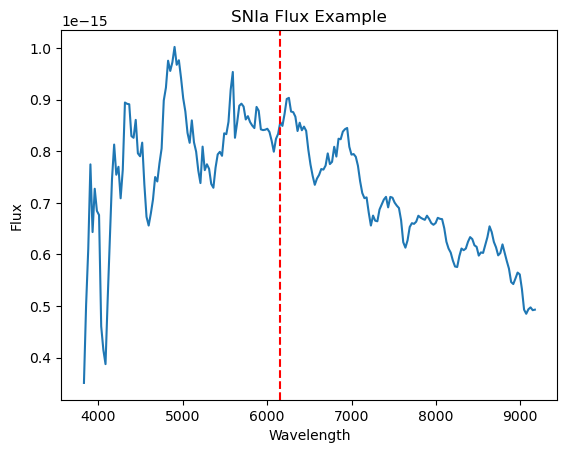

In [14]:
# Plot example spectra
silicon_line = 6150

plt.plot(ex_SNIa_wave[2:-2],ex_SNIa_flux[2:-2])
plt.axvline(x=silicon_line, color='r', linestyle='--')
plt.title('SNIa Flux Example')
plt.xlabel('Wavelength')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

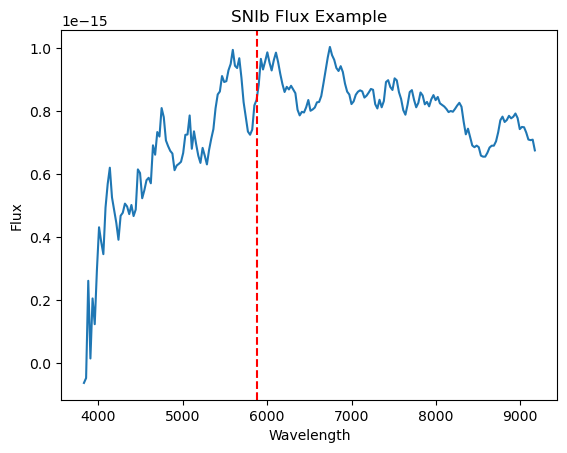

In [15]:
# Plot example spectra
helium_line = 5876
plt.plot(ex_SNIb_wave[2:-2],ex_SNIb_flux[2:-2])
plt.axvline(x=helium_line, color='r', linestyle='--')
plt.title('SNIb Flux Example')
plt.xlabel('Wavelength')
plt.ylabel('Flux')

In [16]:
min(df_merged['wavelengths'])

'[10000.114440917969, 10001.548528671265, 10002.981424331665, 10004.415512084961, 10005.849599838257, 10007.282495498657, 10008.716583251953, 10010.149478912354, 10011.58356666565, 10013.017654418945, 10014.450550079346, 10015.884637832642, 10017.317533493042, 10018.751621246338, 10020.184516906738, 10021.617412567139, 10023.051500320435, 10024.484395980835, 10025.91848373413, 10027.351379394531, 10028.784275054932, 10030.217170715332, 10031.651258468628, 10033.084154129028, 10034.517049789429, 10035.94994544983, 10037.384033203125, 10038.816928863525, 10040.249824523926, 10041.682720184326, 10043.115615844727, 10044.548511505127, 10045.982599258423, 10047.415494918823, 10048.848390579224, 10050.281286239624, 10051.714181900024, 10053.147077560425, 10054.579973220825, 10056.012868881226, 10057.445764541626, 10058.87746810913, 10060.310363769531, 10061.743259429932, 10063.176155090332, 10064.609050750732, 10066.041946411133, 10067.474842071533, 10068.906545639038, 10070.339441299438, 10

In [17]:
df_merged.columns

Index(['ZTFID', 'IAUID', 'RA', 'Dec', 'peakt', 'peakfilt', 'peakmag',
       'peakabs', 'duration', 'rise', 'fade', 'type_x', 'redshift', 'b', 'A_V',
       'errors', 'followup_request_id', 'created_at', 'units', 'assignment_id',
       'modified', 'obj_id', 'altdata', 'observed_at', 'original_file_string',
       'origin', 'original_file_filename', 'type_y', 'owner_id', 'fluxes',
       'label', 'id', 'wavelengths', 'instrument_id', 'comments',
       'annotations', 'instrument_name', 'telescope_id', 'telescope_name',
       'groups', 'pis', 'reducers', 'observers', 'observed_at_mjd', 'owner',
       'obj_internal_key', 'external_reducer', 'external_observer',
       'external_pi', 'new_type'],
      dtype='object')

## Defining features and labels


In [18]:
df_binary = df_merged[(df_merged['new_type'] == 'SN Ia') | (df_merged['new_type'] == 'SN Ib')]

# Features for classification - we can change these around
# Currently not including the wavelength / flux, but we will see later

features = ['peakabs','duration','redshift','b','peakmag']
label = 'new_type'

features_label = ['peakabs','duration','redshift','b','peakmag','new_type']


new_data = df_binary[features_label]
new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
new_data['redshift'] = pd.to_numeric(new_data['redshift'], errors='coerce')
new_data['b'] = pd.to_numeric(new_data['b'], errors='coerce')

new_data = new_data.dropna()

X = new_data[features]
y = new_data[label]


/var/folders/w8/xfh94qvn4mq8ymxk975nyjsm0000gn/T/ipykernel_70677/3426620735.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['peakabs'] = pd.to_numeric(new_data['peakabs'], errors='coerce')
/var/folders/w8/xfh94qvn4mq8ymxk975nyjsm0000gn/T/ipykernel_70677/3426620735.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['duration'] = new_data['duration'].str.replace('>', '', regex=False)
/var/folders/w8/xfh94qvn4mq8ymxk975nyjsm0000gn/T/ipykernel_70677/3426620735.py:15: SettingWithCopyWarn

## Oversampling 

In [19]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

In [20]:
X_over, y_over = oversample.fit_resample(X, y)

In [21]:
# Oversampled data now has equal counts of Ia and Ib
y_over.value_counts()

new_type
SN Ia    3079
SN Ib    3079
Name: count, dtype: int64

## SVM

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Step 2: Initialize and train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels based on your data
svm_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 4: Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       SN Ia       0.86      0.90      0.88       649
       SN Ib       0.88      0.83      0.86       583

    accuracy                           0.87      1232
   macro avg       0.87      0.87      0.87      1232
weighted avg       0.87      0.87      0.87      1232



 Using just 'peakabs', 'peakmag', 'duration', 'redshift', 'b' as features, we have okay classification abilities. Let's see how this improved when we add in the spectra information

## Logistic Regression

This is for SN Ia vs. SN Ib

Text(0.5, 23.52222222222222, 'Predicted label')

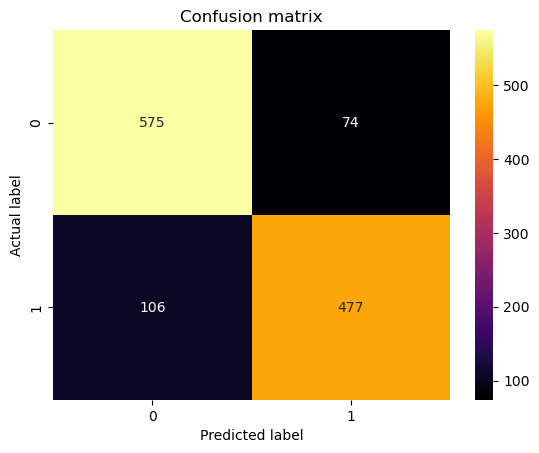

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# using the same split that Abby used above
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
y_prob = y_prob[:, 1]

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="inferno" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# not recognizing my pos_label argument idk why
# fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label = 1)

# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
# roc_display.plot()

# roc_auc = auc(fpr, tpr)
# print("Area under ROC curve (AUC): {:.4f}".format(roc_auc))

All data: SN Ib vs. others